#### Collecting samples for 3D MC

In [3]:
import GAME.envs.mountain_car
import gym
from GAME.agents.sarsa_lambda import SarsaLambdaCMAC3DMountainCar
from GAME.utils.helper_funcs import *
from GAME.utils.data_loaders import *

In [4]:
env_name = 'MountainCar3D-v0'
env = gym.make(env_name, render_mode = None)
env._max_episode_steps = 5000
observation, info = env.reset(seed=42)

# agent
alpha = 1.2
lamb = 0.95
gamma = 1
method = 'replacing'
epsilon = 0
num_of_tilings = 8
max_size = 2048
agent = SarsaLambdaCMAC3DMountainCar(alpha, lamb, gamma, method, epsilon, num_of_tilings, max_size)

# experiment parameters
max_episodes = 50
total_steps = 0 # eval metric
update_agent = True
debug = True

# data collector
save_every = 5
agent_info = SarsaLambdaAgentInfo(alpha, lamb, gamma, method, epsilon, num_of_tilings, max_size)
experiment_info = ExperimentInfo(env_name, env._max_episode_steps, 42, max_episodes, 'SarsaLambda')
data_column_names = ['Episode', 'Step', 'Current_x_position', 'Current_x_velocity', 'Current_y_position', 'Current_y_velocity',
'Current_action', 'Reward', 'Next_x_position', 'Next_x_velocity', 'Next_y_position', 'Next_y_velocity', 'Next_action']
data_column_dtypes = ['int', 'int', 'float', 'float', 'float', 'float', 'int', 'int', 'float', 'float', 'float', 'float', 'int']
data_collector = RLSamplesCollector(experiment_info, agent_info, data_column_names, data_column_dtypes)
path = "C:\\Users\\minhh\\Documents\\JHU\\Fall 2022\\Evolutionary and Swarm Intelligence\\src\\GAME\\output\\10242022 Initial Samples Collection for 3D MC\\"
file_name = 'test.csv'
data_collector.write_metadata(path, 'test_metadata.txt')

In [5]:
for ep in range(max_episodes):
    steps = 0
    while True:
        try:
            # current state
            current_state = observation # [x, x_dot, y, y_dot]
            action = agent.choose_action_eps_greedy(current_state)
            # next state
            observation, reward, terminated, truncated, info = env.step(action)
            # next action
            next_action = agent.choose_action_eps_greedy(observation)
            # env.render()

            # update agent
            if update_agent:
                target = reward + agent.get_value(observation, next_action)
                active_tiles = agent.get_active_tiles(current_state, action)
                agent.update(active_tiles, target)

            # save data
            data_dict = {
                col_name : col_data for col_name, col_data in zip(data_column_names, [ep, steps, current_state[0], current_state[1], current_state[2], current_state[3],
                action, reward, observation[0], observation[1], observation[2], observation[3], next_action])
            }
            data_collector.log_data(data_dict)

            # prep the next iteration
            steps += 1

            # reset the training
            if terminated or truncated:
                observation, info = env.reset()
                total_steps += steps
                if debug:
                    print("Episode: {}, Number of steps: {}, Total steps: {}".format(ep, steps, total_steps))
                break
        except KeyboardInterrupt:
            env.close()
            data_collector.export_data(path, file_name)
    # save data every few iterations
    if save_every and (ep % save_every == 0):
        data_collector.export_data(path, file_name)

# training complete
env.close()
print("Average steps per episode: {}".format(total_steps / max_episodes))
data_collector.export_data(path, file_name)

IHT full, starting to allow collisions
Episode: 0, Number of steps: 5000, Total steps: 5000
Episode: 1, Number of steps: 5000, Total steps: 10000
Episode: 2, Number of steps: 5000, Total steps: 15000
Episode: 3, Number of steps: 5000, Total steps: 20000
Episode: 4, Number of steps: 5000, Total steps: 25000
Episode: 5, Number of steps: 5000, Total steps: 30000
Episode: 6, Number of steps: 5000, Total steps: 35000
Episode: 7, Number of steps: 5000, Total steps: 40000
Episode: 8, Number of steps: 5000, Total steps: 45000
Episode: 9, Number of steps: 5000, Total steps: 50000
Episode: 10, Number of steps: 5000, Total steps: 55000
Episode: 11, Number of steps: 5000, Total steps: 60000
Episode: 12, Number of steps: 5000, Total steps: 65000
Episode: 13, Number of steps: 5000, Total steps: 70000
Episode: 14, Number of steps: 5000, Total steps: 75000
Episode: 15, Number of steps: 5000, Total steps: 80000
Episode: 16, Number of steps: 5000, Total steps: 85000
Episode: 17, Number of steps: 5000, T

#### Trying out 3D Mountain Car implemented in Gym

In [ ]:
import GAME.envs.mountain_car
import gym
import numpy as np
env = gym.make('MountainCar3D-v0')
observation, info = env.reset(seed=42)

In [ ]:
observation

array([-0.4452088,  0.       , -0.5122243,  0.       ], dtype=float32)

In [ ]:
action = env.action_space.sample()
action

0

In [ ]:
observation, reward, terminated, truncated, info = env.step(action)
print("Observation: {}".format(observation))

Observation: [-4.457913e-01 -5.825207e-04 -5.123096e-01 -8.529192e-05]


In [ ]:
info

{'z_position': -1.9718926078380767}

In [ ]:
# init environment
env = gym.make('MountainCar3D-v0')
observation, info = env.reset(seed=42)

# run an episode and record moves
max_steps = 1000
t = [i for i in range(max_steps)]
x_positions = []
x_velocities = []
y_positions = []
y_velocities = []
actions = []
z_positions = []

for _ in range(max_steps):
    action = env.action_space.sample()
    action = np.random.choice([3, 4], 1)[0]
    action = 4
    observation, reward, terminated, truncated, info = env.step(action)
    x_positions.append(observation[0])
    x_velocities.append(observation[1])
    y_positions.append(observation[2])
    y_velocities.append(observation[3])
    actions.append(action)
    z_positions.append(info['z_position'])
    # env.render()

    if terminated or truncated:
        observation, info = env.reset()
env.close()

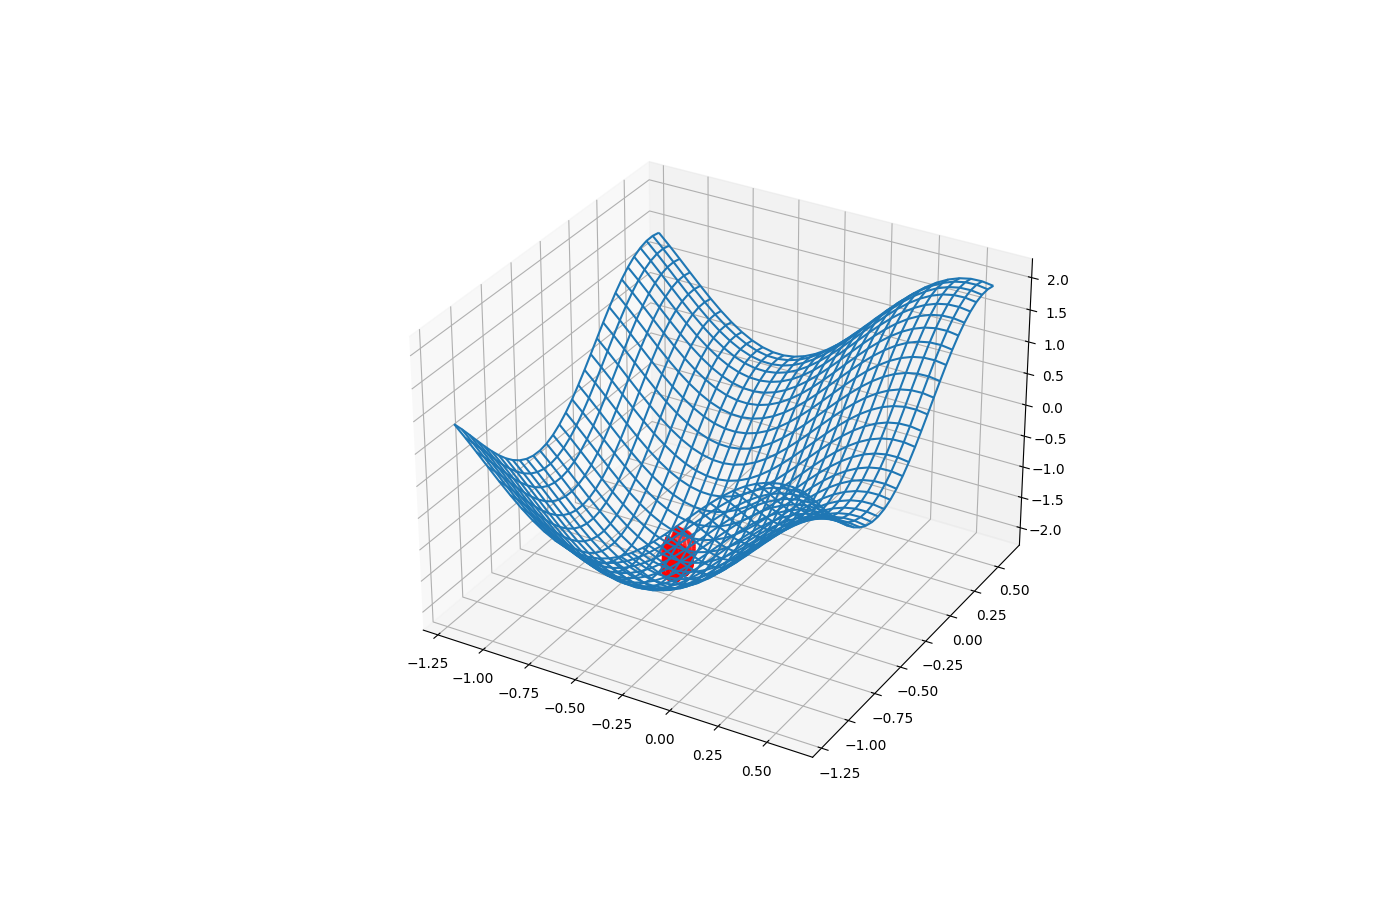

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
 
# Creating dataset
x = np.outer(np.linspace(-1.2, 0.6, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(3* x) + np.sin(3 * y) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating terrain
terrain = ax.plot_wireframe(x, y, z)

# Plot car's trajectory
particle = ax.scatter(x_positions, y_positions, z_positions, c='r', s=5)
 
# show plot
plt.show()

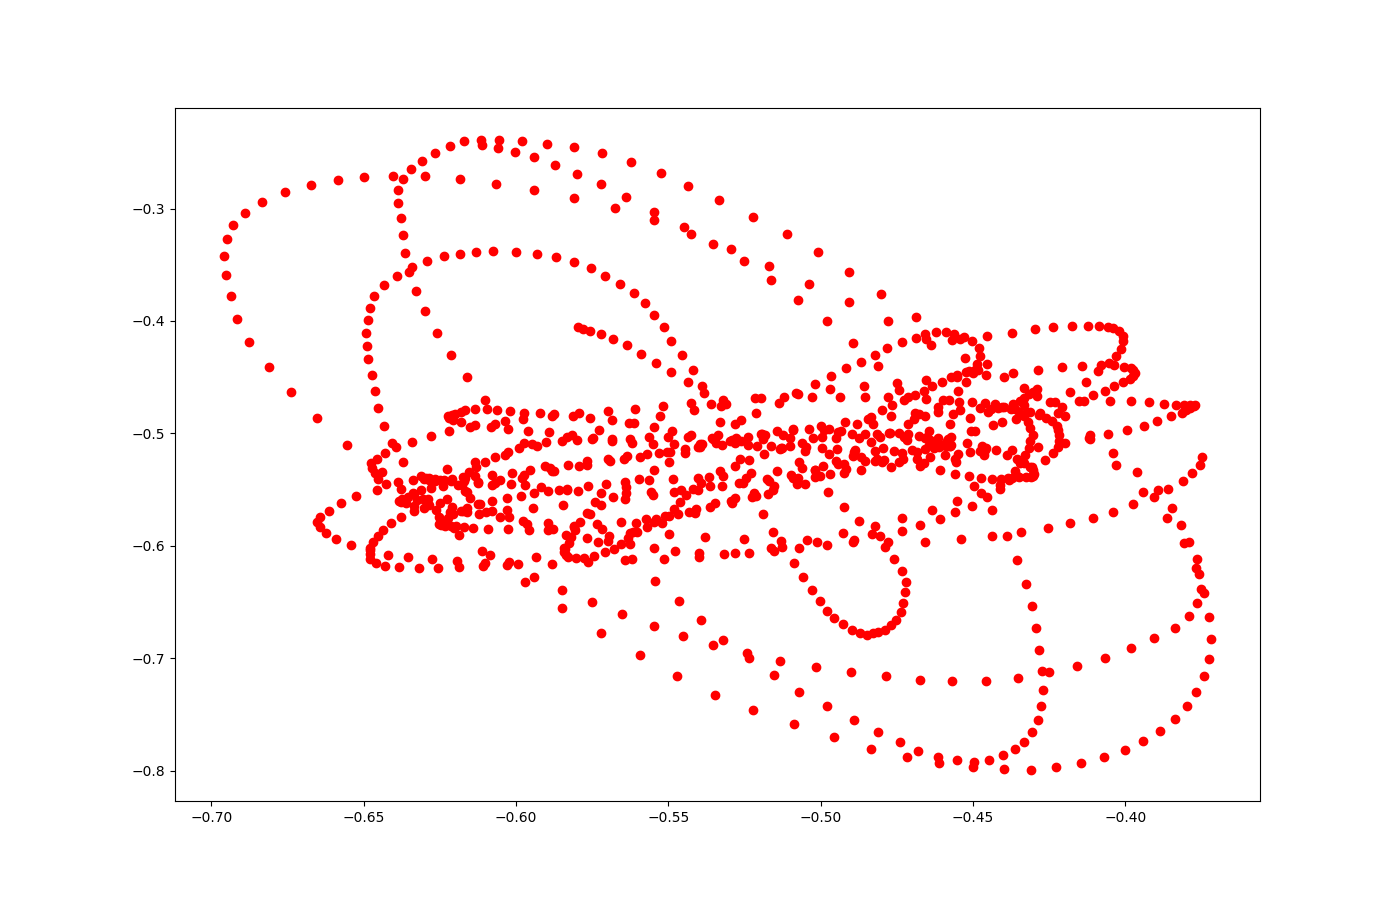

In [ ]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes()

# Plot car's trajectory
particle = ax.scatter(x_positions, y_positions, c='r')
 
# show plot
plt.show()

In [ ]:
import os
import imageio

def create_image(model, t:int) -> tuple:
    # Source: https://pnavaro.github.io/python-fortran/06.gray-scott-model.html
    for t in range(t):
        model.update()
    c = np.uint8(255 * (model.c_cur - model.c_cur.min()) / (model.c_cur.max() - model.c_cur.min()))
    return c, model

def create_frames(n, model, t:int) -> list:
    # Source: https://pnavaro.github.io/python-fortran/06.gray-scott-model.html
    c_frames = []
    for _ in tqdm(range(n)):
        c, model = create_image(model, t)
        c_frames.append(c)
    return c_frames

filenames = []
for i in range(len(x_positions)):
    # plot the line chart
    plt.scatter(x_positions[:i], y_positions[:i], c='r')
    plt.ylim(-1.2, 0.6)
    plt.xlim(-1.2, 0.6)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

c:\Users\minhh\Documents\JHU\Fall 2022\Evolutionary and Swarm Intelligence\src\GAME\venv\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


#### Testing visualization for 3D MC

In [1]:
import GAME.envs.mountain_car
import gym
from GAME.agents.sarsa_lambda import SarsaLambdaCMAC3DMountainCar
from GAME.utils.helper_funcs import *

In [ ]:
# init environment
env = gym.make('MountainCar3D-v0', render_mode = 'human')
env._max_episode_steps = 5000
observation, info = env.reset(seed=42)

# run an episode and record moves
max_steps = 1000

for _ in range(max_steps):
    try:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        env.render()

        if terminated or truncated:
            observation, info = env.reset()
    except KeyboardInterrupt:
        env.close()
env.close()